In [1]:
import re
import numpy as np
import pandas as pd

# Word Counts with BOW Approach

### Bag-of-Words

* Basic method for finding topics in a text
* Need to first create tokens using tokenization
* ... and then count up all the tokens
* The more frequent a word, the more important it might be
* Can be a great way to determine the significant words in a text

### Example:

* Text: 
    * "The cat is in the box. The cat likes the box. The box is over the cat"

* BOW:
    * "The": 3, "box": 3
    * "cat": 3, "the": 3
    * "is": 2
    * "in": 1, "likes": 1, "over": 1

In [4]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [5]:
text = "The cat is in the box. The cat likes the box. The box is over the cat"

Counter(word_tokenize(text))

Counter({'.': 2,
         'The': 3,
         'box': 3,
         'cat': 3,
         'in': 1,
         'is': 2,
         'likes': 1,
         'over': 1,
         'the': 3})

In [7]:
counter = Counter(word_tokenize(text))
counter.most_common(2)

[('the', 3), ('cat', 3)]

### Building a Counter with BOW

In [8]:
tokens = word_tokenize(text)
lower_tokens = [t.lower() for t in tokens]
bow_simple = Counter(lower_tokens)
print(bow_simple.most_common(3))

[('the', 6), ('cat', 3), ('box', 3)]


### Simple Text Preprocessing

* Tokenization to create BOW
* Lowercasing words
* Lemmatization/Stemming
    * Shorten words to their root stems
* Removing stop words, punctuation, or unwanted tokens

In [10]:
from nltk.corpus import stopwords

tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]

Counter(no_stops).most_common(3)

[('cat', 3), ('box', 3), ('likes', 1)]

### Text Preprocessing Practice

In [11]:
from nltk.stem import WordNetLemmatizer

alpha_only = [t for t in lower_tokens if t.isalpha()]
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

bow = Counter(lemmatized)

bow.most_common(5)

[('cat', 3), ('box', 3), ('like', 1)]

# Gensim

* Popular open-source NLP library
* Uses academic models to perform complex tasks
    * Building document or word vectors
    * Performing topic identification and document comparison

In [134]:
import wikipedia
doc1 = wikipedia.page("Topology").content
doc2 = wikipedia.page("Group Theory").content
doc3 = wikipedia.page("Homotopy").content
doc4 = wikipedia.page("Homology (mathematics)").content
doc5 = wikipedia.page("Mathematics").content

my_documents = [doc1, doc2, doc3, doc4, doc5]

In [135]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

stopwords = set(stopwords.words('english'))

def preprocess(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    filtered_words = filter(lambda token: token not in stopwords, tokens)
    return " ".join(filtered_words)

# my_documents = ['The move was about a spaceship and aliens.',
#                 'I really liked the movie!',
#                 'Awesome action scenes, but boring characters.',
#                 'The movie was awful! I hate alien films.',
#                 'Space is cool! I liked the movie.',
#                 'More space films, please!']

depunct = [preprocess(doc) for doc in my_documents]
tokenized_docs = [word_tokenize(doc) for doc in depunct]

dictionary = Dictionary(tokenized_docs)
# dictionary.token2id

# first element = dictionary value
# second elements = frequency of dictionary value in document
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
len(corpus)

5

In [136]:
# movie_id = dictionary.token2id.get("computer")
# print(dictionary.get(movie_id))

In [137]:
from collections import defaultdict
import itertools

doc = corpus[3]

# Sort the doc for frequency
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 10 words of the document alongside the count
for word_id, word_count in bow_doc[:15]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(),
                           key = lambda w: w[1], reverse=True)

print("")
for word_id, word_count in sorted_word_count[:15]:
    print(dictionary.get(word_id), word_count)

n 178
1 112
homology 92
x 83
0 73
displaystyle 69
_ 43
groups 42
b 39
c 38
2 36
z 35
k 32
partial 32
chain 31

n 246
x 226
1 192
mathematics 189
groups 186
group 171
theory 164
0 146
topology 132
displaystyle 110
homology 101
g 98
one 96
homotopy 93
mathematical 77


## TF-IDF with Gensim

* Term frequency - inverse document frequency
* Allows you to determine the most important words in each document
* Each corpus may have shared words beyond stopwords
* These words should be down-weighted in importance
* Example from astronomy: "Sky"
* Ensures most common words don't show up as key words
* Keeps document specific frequent words weighted high

$$ w_{ij} = tf_{ij} \cdot \text{log}(\frac{N}{df_{i}})$$
$$ w_{ij} = \text{tf-idf weight for token} \ i \ \text{in document} \ j$$
$$ tf_{i} = \text{number of occurences of token} \ i \ \text{in document} \ j$$
$$ df_{i} = \text{number of documents that contain token} \ i$$
$$ N = \text{total number of documents} $$

In [139]:
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc (corpus[4])
doc = corpus[1]
tfidf_weights = tfidf[doc]

# Print the first 10 weights
print(tfidf_weights[:10])

# Sort the weights from highest to lowest
sorted_tfidf_weights = sorted(tfidf_weights,
                              key = lambda w: w[1], reverse=True)

for term_id, weight in sorted_tfidf_weights[:10]:
    print(dictionary.get(term_id), weight)

[(0, 0.03510525229977085), (4, 0.011088625075975246), (21, 0.011088625075975246), (25, 0.012363660624519365), (27, 0.010801616092237185), (28, 0.006181830312259683), (29, 0.0027004040230592962), (30, 0.012363660624519365), (31, 0.006181830312259683), (32, 0.018545490936779048)]
symmetry 0.34374737735523264
permutation 0.31162953806225907
symmetries 0.19476846128891193
molecule 0.15581476903112954
representation 0.15581476903112954
finite 0.15454575780649205
presentation 0.13633792290223837
lie 0.12363660624519365
acting 0.11686107677334717
equation 0.11686107677334717


## Named Entity Recognition

* NLP tasks to identify important named entities in the text
    * People, places, organizations
    * Dates, states, works of art
    * ... and other categories
* Can we used alongside topic identification
    * ... or on its own
* Who? What? When? Where?

In [142]:
import nltk

sentence = '''In New York, I like to ride the Metro 
              and visit MOMA and some restaurants rated 
              well by Ruth Reichl.'''

tokenized_sent = nltk.word_tokenize(sentence)

# sentence for parts of speech
tagged_sent = nltk.pos_tag(tokenized_sent)

print(tagged_sent[:3])

print("")

# Named Entity Chunk -- returns sentence as a tree
print(nltk.ne_chunk(tagged_sent))

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  and/CC
  visit/NN
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


### NER with NLTK Example

In [144]:
from nltk.tokenize import word_tokenize, sent_tokenize

article = doc4

# tokenize article into sentences
sentences = sent_tokenize(article)

# tokenize sentences into words
token_sentences = [word_tokenize(sent) for sent in sentences]

# tag each tokenized setence into parts of speech
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# create the Named Entity chunks
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            print(chunk)

(NE Homology/NN)
(NE Lie/NNP)
(NE Galois/NNP)
(NE Homology/NNP)
(NE Euler/NNP)
(NE Euler/NNP)
(NE Riemann/NNP)
(NE Betti/NNP)
(NE Jordan/NNP)
(NE Cycle/NNP)
(NE Klein/NNP)
(NE Euclidean/NNP)
(NE Möbius/NNP)
(NE Again/NNP)
(NE Klein/NNP)
(NE Klein/NNP)
(NE Klein/NNP)
(NE Klein/NNP)
(NE Klein/NNP)
(NE Henri/NNP Poincaré/NNP)
(NE Betti/NNP)
(NE Betti/NNP)
(NE Euler/NNP)
(NE Poincaré/NNP)
(NE Emmy/NNP Noether/NNP)
(NE Leopold/NNP Vietoris/NNP)
(NE Walther/NNP Mayer/NNP)
(NE Homology/NNP)
(NE Betti/NNP)
(NE Algebraic/NNP)
(NE Cartesian/JJ)
(NE Cartesian/JJ)
(NE Cohomology/NN)
(NE Smith/NNP)
(NE Euler/NNP)
(NE Hamel/NNP)
(NE Euler/NNP)
(NE Brouwer/NNP)
(NE Hairy/NNP)
(NE Euclidean/JJ)
(NE Euclidean/JJ)
(NE Poincaré/NNP)
(NE Morse/NNP)
(NE Floer/NNP)
(NE KAM/NNP)
(NE Floer/NNP)
(NE FEM/NNP)
(NE Software/NNP)
(NE Linbox/NNP)
(NE Smith/NNP)
(NE Maple/NNP)
(NE Chomp/NNP)
(NE CAPD/NNP)
(NE Kenzo/NNP)
(NE Lisp/NNP)
(NE Gmsh/NNP)
(NE Cohomology/NNP)
(NE Betti/NNP)
(NE Cycle/NNP)
(NE Künneth/NNP)
(N

### Charting Practice

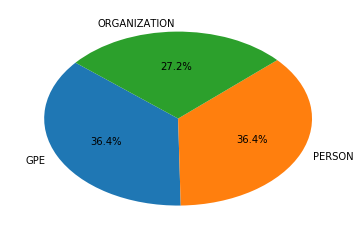

In [148]:
import matplotlib.pyplot as plt
% matplotlib inline

# Create the defaultdict
ner_categories = defaultdict(int)

# create the Named Entity chunks
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys
labels = list(ner_categories.keys())

# Create a list of the values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

## Comparing NLTK with SpaCy NER

In [156]:
import spacy

nlp = spacy.load(name='en', tagger=False, parser=False, matcher=False)

my_doc = nlp(doc4)

for ent in my_doc.ents:
    print(ent.label_, ent.text)

PERSON Lie
ORG Galois
GPE 

CARDINAL two
CARDINAL two
CARDINAL one
GPE 

ORDINAL nth
ORDINAL 



GPE 

LOC Euler
ORG Euler
PERSON Riemann
DATE 1857
ORG Betti
DATE 1871
GPE 

CARDINAL 1-cycle
WORK_OF_ART 
  
    
      
        
          S
          
            1
GPE 
   
CARDINAL 1-manifold
CARDINAL three
CARDINAL 2-cycle
CARDINAL 2
WORK_OF_ART \displaystyle S^{2
ORG 
  
GPE Jordan
CARDINAL zero
CARDINAL zero
CARDINAL two
CARDINAL two
GPE 
   
CARDINAL zero
GPE 

CARDINAL One
GPE 

CARDINAL four
QUANTITY \displaystyle K^{2}
GPE 
   
PERSON Klein
CARDINAL one
CARDINAL one
ORDINAL second
ORG Möbius
GPE 
   
GPE 

GPE Cycles
PERSON Klein
PERSON −a
PERSON −a
PERSON −a
GPE 

CARDINAL two
PERSON Klein
CARDINAL one
PERSON −a
PERSON Klein
PERSON −a
CARDINAL 0
CARDINAL zero
CARDINAL 2
PERSON Klein
PERSON Klein
CARDINAL only one
GPE 

CARDINAL two
CARDINAL 2n
CARDINAL non-zero
CARDINAL 2n
GPE 

ORDINAL first
PERSON Henri Poincaré
NORP Analysis
PERSON J. Ecole
CARDINAL 2
CARDINAL 1
CARDINAL 1–1

PERSON An-1
GPE 
          
            
GPE 
            
GPE 
          
            
GPE ∘
        
          
PERSON f_{n-1}\circ d_{n}=e_{n}\circ
GPE 
   
GPE 

ORG Hn
GPE 

ORG Hn
GPE 

PERSON An-1
LOC Euler
PRODUCT 
        
PERSON 
        
ORG 
        
ORG 
          
ORG 
          
ORG 
          
GPE 
        
        
GPE 
        
          
GPE 
          
            
GPE \sum
CARDINAL A_{n
PERSON 
  

GPE Hamel
LOC Euler
PERSON 
        
ORG 
        
PERSON 
        
ORG 
        
ORG 
          
ORG 
          
ORG 
          
GPE 
        
        
GPE 
        
          
GPE 
          
            
ORG \sum
PERSON H_{n
PERSON 
  

CARDINAL two
GPE 

MONEY 0
        
PRODUCT 
        A
ORG 
        
PRODUCT 
        B
ORG 
        
ORG 
        
DATE \displaystyle 0\rightarrow A\rightarrow
CARDINAL 0
ORG 
        
          H
GPE 
          
            
PRODUCT 
        A
ORG 
        
ORG 
        
          H
GPE 
          
            
PRODUCT 
        B
   

# Classifying Fake News

### Naive Bayes Classifier

* Commonly used for testing NLP classification problems
* Basis in probability

* Given a particular piece of data, how likely is a particular outcome?
* Each word from `CountVectorizer` acts as a feature

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.sort(np.array([1,1,2,2,2,3,6,6,6,6,6,6,10,10]))
y = np.arange(1, len(x) + 1)/len(x)
# plt.plot(x,y)

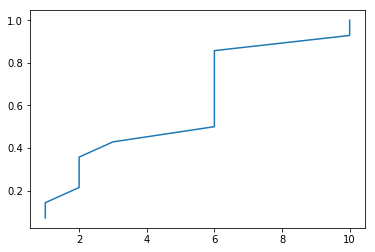

In [7]:
plt.plot(x,y)